## __timmのスケジューラー__

__Document__

- https://timm.fast.ai/schedulers

- https://huggingface.co/docs/timm/reference/schedulers

__利用可能なススケジューラー__

- CosineLRScheduler

- MultiStepLRScheduler

- PlateauLRScheduler

- PolyLRScheduler

- StepLRScheduler

- TanhLRScheduler

使い方の記事

https://towardsdatascience.com/getting-started-with-pytorch-image-models-timm-a-practitioners-guide-4e77b4bf9055




In [60]:
!pip install timm | tail -n1

In [61]:
from matplotlib import pyplot as plt
import torch
import timm

In [62]:
model = timm.create_model('resnet34')

# (warmupをしない場合の)学習率の初期値
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

### __[CosineLRScheduler](https://timm.fast.ai/SGDR#CosineLRScheduler)__



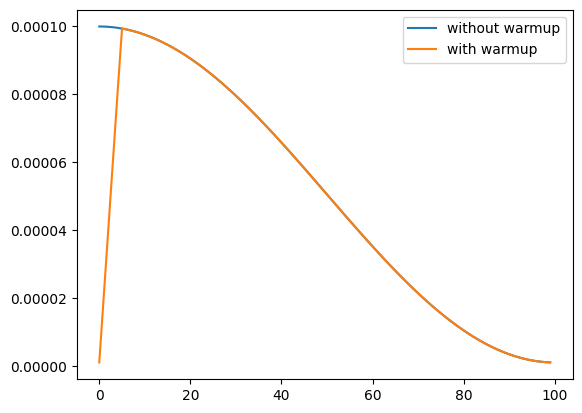

In [63]:
# warmupなし
scheduler_without_warmup = timm.scheduler.CosineLRScheduler(
    optimizer,
    t_initial=100,  # エポック数
    lr_min=1e-6,    # 学習率の最小値
)

lr_list = []
for epoch in range(100):
    scheduler_without_warmup.step(epoch)
    lr = optimizer.param_groups[0]["lr"]
    lr_list.append(lr)
plt.plot(lr_list, label="without warmup")

# warmupあり
scheduler_with_warmup = timm.scheduler.CosineLRScheduler(
    optimizer,
    t_initial=100,  # エポック数
    lr_min=1e-6,    # 学習率の最小値
    warmup_t=5,    # warmupするエポック数
    warmup_lr_init=1e-6,  # warmupする時の学習率の初期値
)

lr_list = []
for epoch in range(100):
    scheduler_with_warmup.step(epoch)
    lr = optimizer.param_groups[0]["lr"]
    lr_list.append(lr)
plt.plot(lr_list, label="with warmup")

plt.legend()
plt.show()

## __[StepLRScheduler](https://timm.fast.ai/stepLR#StepLRScheduler)__

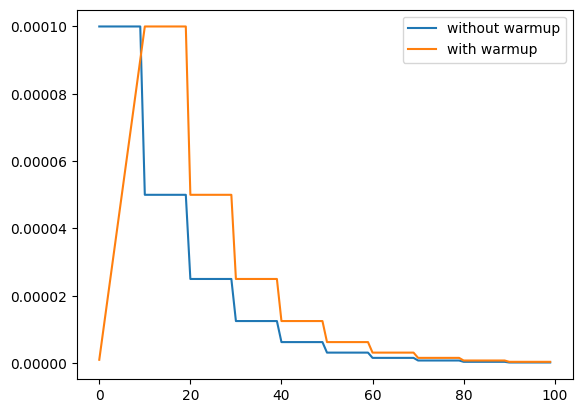

In [64]:
# warmupなし
scheduler_without_warmup = timm.scheduler.StepLRScheduler(
    optimizer,
    decay_t=10,  # 何エポックごとに学習率を減少させるか
    decay_rate=0.5,  # 学習率の減少割合
)

lr_list = []
for epoch in range(100):
    scheduler_without_warmup.step(epoch)
    lr = optimizer.param_groups[0]["lr"]
    lr_list.append(lr)
plt.plot(lr_list, label="without warmup")

# warmupあり
scheduler_with_warmup = timm.scheduler.StepLRScheduler(
    optimizer,
    decay_t=10,  # 何エポックごとに学習率を減少させるか
    decay_rate=0.5,  # 学習率の減少割合
    warmup_t=10,    # warmupするエポック数
    warmup_lr_init=1e-6,  # warmupする時の学習率の初期値
)

lr_list = []
for epoch in range(100):
    scheduler_with_warmup.step(epoch)
    lr = optimizer.param_groups[0]["lr"]
    lr_list.append(lr)
plt.plot(lr_list, label="with warmup")

plt.legend()
plt.show()

## __[TanhLRScheduler](https://timm.fast.ai/tanh#TanhLRScheduler)__

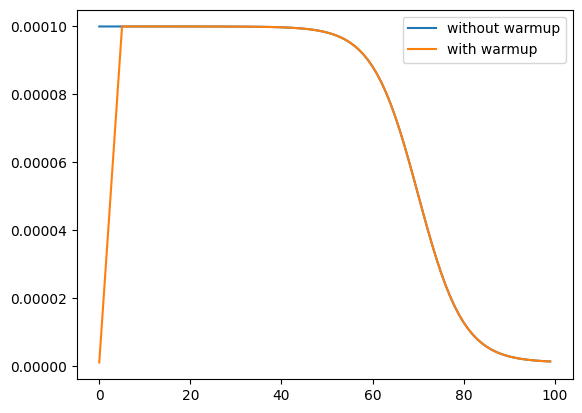

In [65]:
# warmupなし
scheduler_without_warmup = timm.scheduler.TanhLRScheduler(
    optimizer,
    t_initial=100,  # エポック数
    lr_min=1e-6,    # 学習率の最小値
)

lr_list = []
for epoch in range(100):
    scheduler_without_warmup.step(epoch)
    lr = optimizer.param_groups[0]["lr"]
    lr_list.append(lr)
plt.plot(lr_list, label="without warmup")

# warmupあり
scheduler_with_warmup = timm.scheduler.TanhLRScheduler(
    optimizer,
    t_initial=100,  # エポック数
    lr_min=1e-6,    # 学習率の最小値
    warmup_t=5,    # warmupするエポック数
    warmup_lr_init=1e-6,  # warmupする時の学習率の初期値
)

lr_list = []
for epoch in range(100):
    scheduler_with_warmup.step(epoch)
    lr = optimizer.param_groups[0]["lr"]
    lr_list.append(lr)
plt.plot(lr_list, label="with warmup")

plt.legend()
plt.show()